# UBER TRIP ANALYSIS

In [1]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data
df = pd.read_csv(r"C:\Users\SAI KIRAN\Desktop\uber-raw-data-jun14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [3]:
#inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  663844 non-null  object 
 1   Lat        663844 non-null  float64
 2   Lon        663844 non-null  float64
 3   Base       663844 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.3+ MB


In [4]:
#checking for null values
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [5]:
#changing datetime column from string to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [6]:
#verifying it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  663844 non-null  datetime64[ns]
 1   Lat        663844 non-null  float64       
 2   Lon        663844 non-null  float64       
 3   Base       663844 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 20.3+ MB


# Insights Gained

    1.Highest Number of Uber Pickups by the hour, month
    2.Highest number of pickups based on base
    3.TLC with the highest number of pickups
    4.graph with average pickups over the week days
    5.heatmap of hours/ weekdays and frequency of pickups

## dividing data into bins of datetime

In [8]:
#using dt.floor() for creating bins of interval 15mins and create a new column
df['binned hour']= df['Date/Time'].dt.floor('15min')
df['binned hour']

0        2014-06-01 00:00:00
1        2014-06-01 00:00:00
2        2014-06-01 00:00:00
3        2014-06-01 00:00:00
4        2014-06-01 00:00:00
                 ...        
663839   2014-06-30 22:30:00
663840   2014-06-30 23:00:00
663841   2014-06-30 23:00:00
663842   2014-06-30 23:15:00
663843   2014-06-30 23:30:00
Name: binned hour, Length: 663844, dtype: datetime64[ns]

## creating seperate columns for date and time

In [11]:
df['date'] = df['binned hour'].dt.date
df['time'] = df['binned hour'].dt.time

In [12]:
df.head()

,Date/Time,Lat,Lon,Base,binned hour,date,time
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,2014-06-01,2014-06-01,00:00:00
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,2014-06-01,2014-06-01,00:00:00
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,2014-06-01,2014-06-01,00:00:00
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,2014-06-01,2014-06-01,00:00:00
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,2014-06-01,2014-06-01,00:00:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date/Time    663844 non-null  datetime64[ns]
 1   Lat          663844 non-null  float64       
 2   Lon          663844 non-null  float64       
 3   Base         663844 non-null  object        
 4   binned hour  663844 non-null  datetime64[ns]
 5   date         663844 non-null  object        
 6   time         663844 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 35.5+ MB


## extracting Weekday from date column

In [14]:
DayMap={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
df['date'] = pd.to_datetime(df['date'])
df['Weekday'] = df['date'].dt.weekday.map(DayMap)
df.head()

,Date/Time,Lat,Lon,Base,binned hour,date,time,Weekday
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,2014-06-01,2014-06-01,00:00:00,Sunday
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,2014-06-01,2014-06-01,00:00:00,Sunday
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,2014-06-01,2014-06-01,00:00:00,Sunday
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,2014-06-01,2014-06-01,00:00:00,Sunday
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,2014-06-01,2014-06-01,00:00:00,Sunday


#### Q1. On what date did we see the most number of Uber pickups?
Skill Test: Grouping & Counting

In [16]:
df.groupby(df['date'])['binned hour'].count().sort_values(ascending = False ).head(1)

date
2014-06-13    31207
Name: binned hour, dtype: int64

Ans : Highest number of pickups happened on 13-June-2014

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?
Skill Test: Indexing and filtering

In [19]:
df.groupby(df['date'])['binned hour'].count().sort_values(ascending = False)[0]

31207

Ans: Number of uber pickups happened on highest number of pickups is : 31207

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?
Skill Test: Counting unique values

In [20]:
df['Base'].nunique()

5

Ans : 5 TLC base companies are affiliated with the Uber pickups

#### Q.4 Which TLC base company had the highest number of pickups?
Skill Test: Grouping, counting, and finding the maximum

In [25]:
df.groupby(df['Base'])['binned hour'].count().reset_index().max()

Base           B02764
binned hour    242975
dtype: object

Ans: B02764 had the highest number of pickups

#### Q.5 How many Uber pickups were made at each unique TLC base company?
Skill Test: Grouping and counting

In [31]:
tlc_count = df.groupby(df['Base']).count()['binned hour'].sort_values(ascending = True).reset_index()
tlc_count.rename(columns={'binned hour' : 'Count'},inplace=True)
tlc_count

,Base,Count
0,B02764,8974
1,B02512,32509
2,B02617,184460
3,B02682,194926
4,B02598,242975


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?
Skill Test: Extracting time components, grouping, counting, and finding the maximum

In [40]:
df['hour'] = df['binned hour'].dt.hour
df.groupby(df['hour']).count()['binned hour'].sort_values(ascending = False).head()

hour
17    50452
16    48162
18    45013
15    41586
21    40791
Name: binned hour, dtype: int64

Ans: The busiest time of day between 4pm and 5pm

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?
Skill Test: Data Visualization using Plotting function

Text(0, 0.5, 'NUMBER OF RIDES')

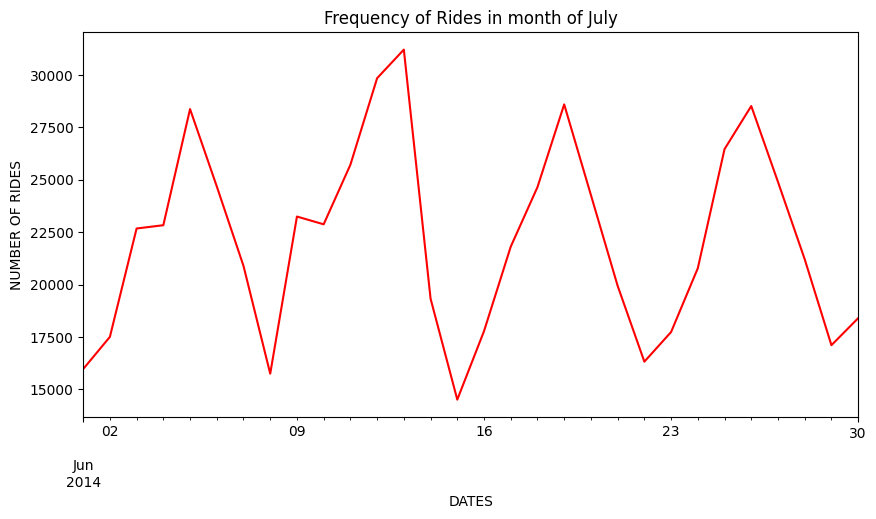

In [48]:
plt.figure(figsize=(10,5))
df['date'].value_counts().sort_index().plot(kind='line',color='red')
plt.title('Frequency of Rides in month of July')
plt.xlabel('DATES')
plt.ylabel('NUMBER OF RIDES')

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?
Skill Test: Scatter Plot

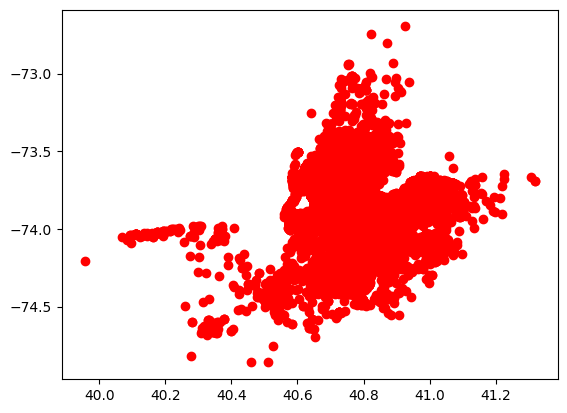

In [58]:
plt.scatter(x=df['Lat'],y=df['Lon'],color = 'red')

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?
Skill Test: Bar Chart

Text(0, 0.5, 'NUMBER OF UBER PICKUPS')

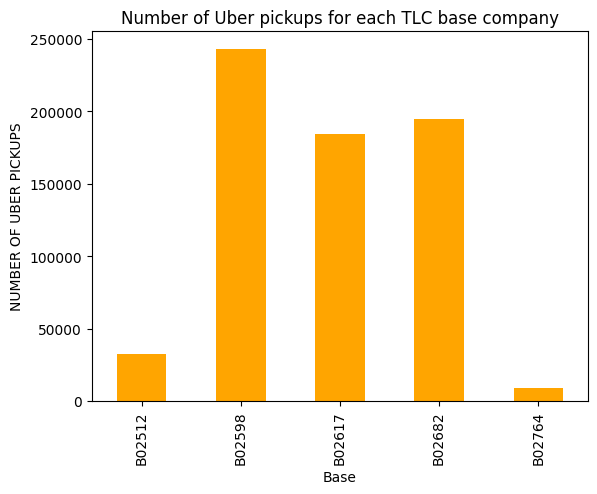

In [62]:
df.groupby(df['Base']).count()['binned hour'].plot(kind='bar',color='orange')
plt.title("Number of Uber pickups for each TLC base company")
plt.ylabel("NUMBER OF UBER PICKUPS")

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?
Skill Test: Pie Chart

In [65]:
weekday_count = df.groupby(df['Weekday']).count()['binned hour'].sort_values(ascending = False).reset_index()
weekday_count.rename(columns={'Weekday':'Day','binned hour':'Count'},inplace=True)
weekday_count

,Day,Count
0,Thursday,115325
1,Friday,105056
2,Wednesday,99654
3,Monday,94655
4,Tuesday,88134
5,Saturday,81364
6,Sunday,79656


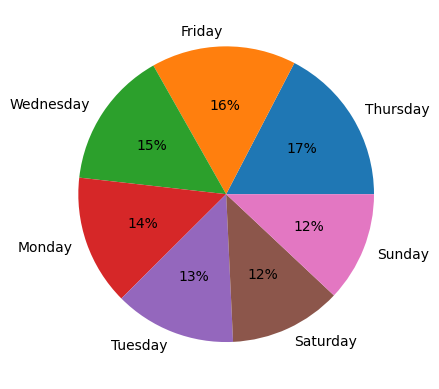

In [68]:
my_labels = weekday_count['Day']
plt.pie(weekday_count['Count'].to_list(),labels=my_labels,autopct="%0.0f%%")
plt.show()